In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data = load_breast_cancer()

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
import pandas as pd
df = pd.DataFrame(data.data, columns = data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df['Class'] = data.target

In [ ]:
df['Class'].value_counts(normalize = True)

1    0.627417
0    0.372583
Name: Class, dtype: float64

In [ ]:
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle = True, stratify = y, test_size = 0.3,
                                                   random_state = 9)

In [ ]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(x_train_std, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
print(f"Train accuracy: {clf.score(x_train_std, y_train)}")
print(f"Test accuracy: {clf.score(x_test_std, y_test)}")

Train accuracy: 0.9874371859296482
Test accuracy: 0.9707602339181286


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
y_pred = clf.predict(x_test_std)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        64
           1       0.96      0.99      0.98       107

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [ ]:
probabilities = clf.predict_proba(x_test_std)
probabilities[:5, :]

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.        , 1.        ]])

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 1)
clf.fit(x_train_std[:, :2], y_train) #train on first two features

KNeighborsClassifier(n_neighbors=1)

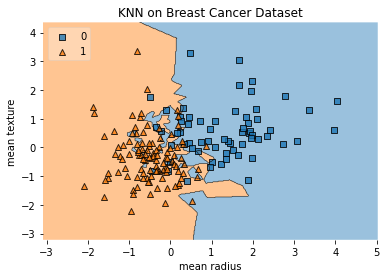

In [ ]:
# Plotting decision regions
import numpy as np
plot_decision_regions(x_test_std[:,:2], np.array(y_test), clf=clf, legend=2)
x_label = data.feature_names[0]
y_label = data.feature_names[1]
# Adding axes annotations
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title('KNN on Breast Cancer Dataset')
plt.show()

In [ ]:
#let us do a PR curve - more appropriate when you have imbalanced data
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc


In [ ]:
#Probabilities were obtained earlier - see one of the cells above
precision, recall, _ = precision_recall_curve(y_test, probabilities[:, 1])

In [ ]:
print(f"AUC for the PR Curve: {auc(recall,precision)}")

AUC for the PR Curve: 0.9890373856880487


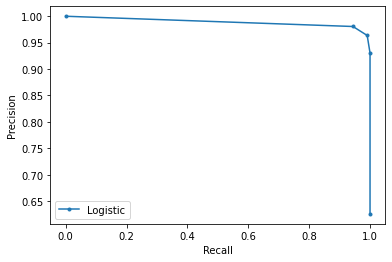

In [ ]:
plt.plot(recall, precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
#Let us use a pipeline to handle a sequence of transformations - example: preprocessing to model fitting
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
pipe.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
y_pred = pipe.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        64
           1       0.96      0.99      0.98       107

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [ ]:
#Using crossvalidation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator = pipe, X=x_train, y=y_train, cv = 10, n_jobs = -1)


In [ ]:
scores

array([1.        , 0.95      , 0.925     , 1.        , 0.95      ,
       0.975     , 0.95      , 0.95      , 0.94871795, 0.97435897])

In [ ]:
np.mean(scores)

0.9623076923076923

In [ ]:
np.std(scores)

0.023087248402316584